https://koreapy.tistory.com/940?category=919110

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 682 kB/s 


In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv("/content/drive/Shareddrives/22-2 캡스톤 프로젝트/데이터/Training Data.csv")

In [ ]:
train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
X=train.iloc[:,1:12]
X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10


In [ ]:
Y=train.iloc[:,-1]
Y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [ ]:
import category_encoders as ce
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(X, Y)
train_cbe = cbe_encoder.transform(X)

In [ ]:
train_cbe

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,0.125336,0.125577,0.128187,0.111561,0.121556,0.154367,3,13
1,7574516,40,10,0.125336,0.125577,0.128187,0.148422,0.122498,0.113254,9,13
2,3991815,66,4,0.102457,0.125577,0.128187,0.134165,0.130803,0.167090,4,10
3,6256451,41,2,0.125336,0.125577,0.110987,0.148422,0.325860,0.142546,2,12
4,5768871,47,11,0.125336,0.125577,0.128187,0.115796,0.121140,0.103164,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0.125336,0.125577,0.128187,0.115467,0.081357,0.128135,6,11
251996,2843572,26,10,0.125336,0.125577,0.128187,0.152107,0.121556,0.154367,6,11
251997,4522448,46,7,0.125336,0.125577,0.128187,0.107003,0.086419,0.113254,7,12
251998,6507128,45,0,0.125336,0.125577,0.128187,0.115371,0.089224,0.116543,0,10


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_cbe, Y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,9121364,70,18,0.125336,0.125577,0.128187,0.122609,0.238308,0.140831,3,11
92611,2636544,39,0,0.125336,0.125577,0.128187,0.128443,0.073198,0.103164,0,11
86397,1010539,39,9,0.125336,0.125577,0.128187,0.130408,0.157534,0.130116,4,13
110500,3897430,21,2,0.125336,0.125577,0.128187,0.128288,0.182886,0.131690,2,12
185133,9470213,41,5,0.125336,0.099530,0.110987,0.109137,0.105711,0.100297,5,13
...,...,...,...,...,...,...,...,...,...,...,...
119879,2357771,59,1,0.125336,0.125577,0.110987,0.152107,0.225244,0.167090,1,12
103694,9314999,51,20,0.102457,0.125577,0.128187,0.131199,0.121526,0.116022,7,10
131932,9013930,25,5,0.125336,0.125577,0.128187,0.135389,0.138702,0.140831,5,10
146867,6660597,40,2,0.125336,0.125577,0.110987,0.111561,0.101701,0.117711,2,14


# Baseline model

In [ ]:
import time
start = time.time()
import lightgbm as lgb
from sklearn.metrics import accuracy_score
clf = lgb.LGBMClassifier()
clf.fit(X=X_train, y=Y_train)
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(Y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)

Classification of the result is:
0.8803174603174603
Execution time is:
2.2920594215393066


#Grid Search

In [ ]:
start = time.time()
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}#Define the scoring
clf=GridSearchCV(lgb,parameters,scoring='accuracy')
clf.fit(X=X_train, y=Y_train)
print(clf.best_params_)
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(Y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)

{'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 15, 'num_leaves': 100, 'reg_alpha': 0.03}
Classification of the result is:
0.8937896825396825
Execution time is:
5912.394549846649


# Random Search

In [ ]:
start = time.time()
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(X=X_train, y=Y_train)
print(clf.best_params_)
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(Y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)

{'reg_alpha': 0.03, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': -1, 'learning_rate': 0.2}
Classification of the result is:
0.8937896825396825
Execution time is:
1096.9778423309326


#Feature Importance

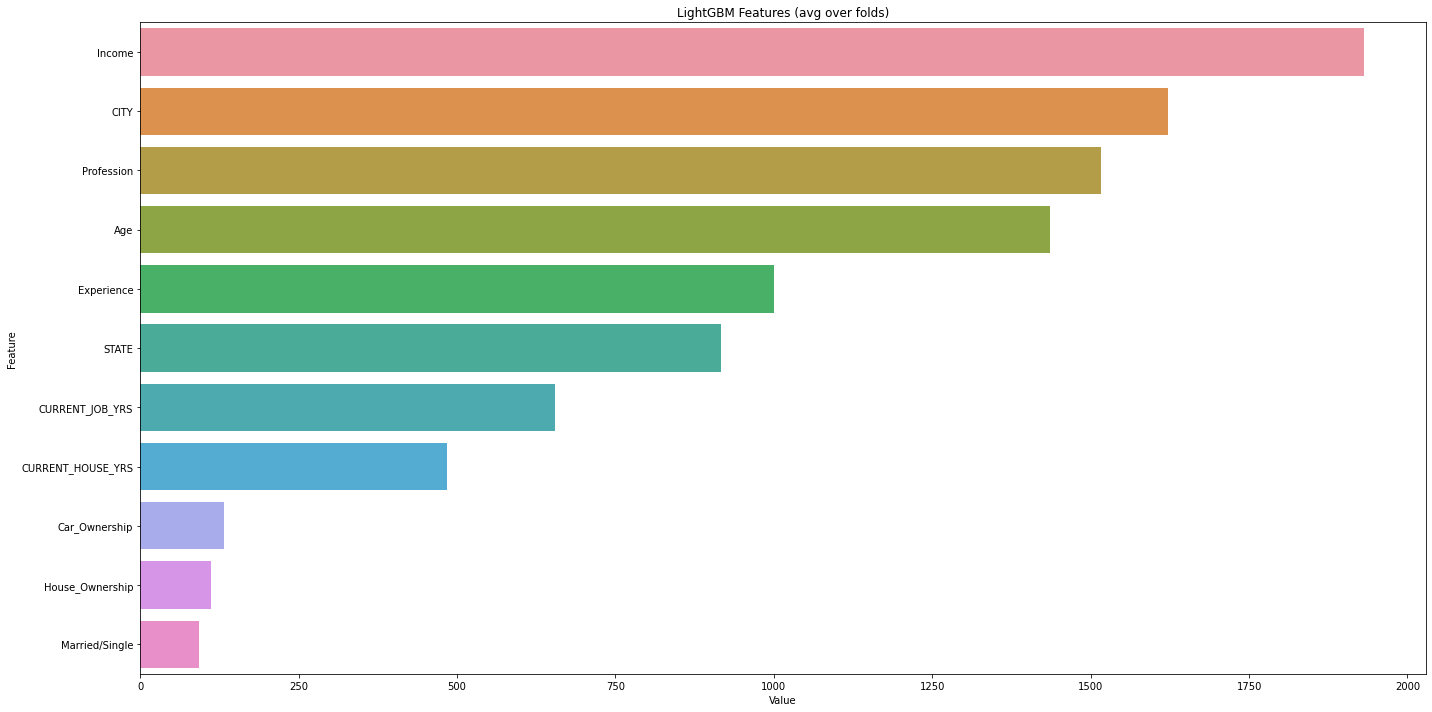

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.best_estimator_.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# Permutance Importance

In [ ]:
from eli5.lightgbm import *
from eli5.sklearn import *
import eli5

perm = PermutationImportance(clf, random_state=42).fit(X_test, y_test)
print(eli5.format_as_text(explain_weights.explain_permutation_importance(perm, feature_names = features, top=40)))

explain_weights.explain_permutation_importance(perm, feature_names = features, top=47)